In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
r = norm.rvs(size=10000)

In [142]:
counts, bins = np.histogram(r, bins=20)

In [143]:
width = (bins[1:] - bins[:-1])[0]
width

0.4072766854292853

In [144]:
stretch = np.array([])
left = np.min(bins)
nbins = np.array([bins[0]])
for i, c in enumerate(counts[1:]):
    # nbins = np.append(nbins, nbins[-1]+width)
    new = np.linspace(counts[i], c, num=2, endpoint=False)
    stretch = np.append(stretch, new)

    # nbins = np.append(nbins, nbins[-1]+width)
    # stretch = np.append(stretch, c)
# nbins = np.append(nbins, nbins[-1]+width)
stretch = np.append(stretch, counts[-1])
nbins = np.arange(bins[0], bins[0]+(width*(len(stretch)+1)), width)

keep = np.sort(np.random.choice(stretch.shape[0], size=int(stretch.shape[0]*0.75), replace=False))
stretch = stretch[keep]
nbins = nbins[keep]

stretch

array([   2. ,    3. ,    4. ,   15. ,   26. ,   35. ,   44. ,   89.5,
        135. ,  241.5,  348. ,  467. ,  586. ,  792.5,  999. , 1166. ,
       1333. , 1486.5, 1640. , 1595. , 1550. , 1430. , 1310. , 1131. ,
        952. ,  781.5,  611. ,  444.5,  278. ,  194. ,  110. ,   79.5,
         49. ,   31.5,   14. ,    9. ,    4. ,    4.5,    5. ])

In [154]:
print(np.sum(counts))
print(np.sum(stretch))

10000
16059.0


ValueError: weights should have the same shape as x

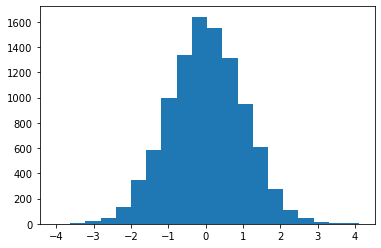

In [155]:
plt.hist(bins[:-1], bins, weights=counts)
plt.hist(nbins[:-1], nbins, weights=stretch*(np.sum(counts)/np.sum(stretch)))